In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [39]:
# Sonar file reading with giving headings to it
sonar_ds = pd.read_csv('Sonar.csv', header=1, names=range(0,61))
sonar_ds

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
1,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
2,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
3,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
4,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
202,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
203,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
204,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [40]:
sonar_ds.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
1,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
2,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
3,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
4,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R


In [41]:
# Converting it to dataFrame
sonar_ds = pd.DataFrame(data=sonar_ds)
sonar_ds

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
1,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
2,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
3,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
4,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
202,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
203,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
204,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [42]:
sonar_ds.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [43]:
sonar_ds.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
1,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
2,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
3,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
4,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R


In [44]:
# Checking the null values of a column
sonar_ds.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

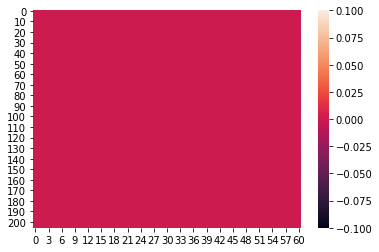

In [45]:
#Heatmap using for visualization of null values in the dataset
sns.heatmap(sonar_ds.isnull())
plt.show()

In [46]:
# Checking the datatypes, so if needed non number data type can be converted to numbers
sonar_ds.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [47]:
# input data for algorithm
x=sonar_ds.iloc[:,0:-1]

In [48]:
x.shape

(206, 60)

In [49]:
# PCA will be used to reduvce the number of columns in a dataset
pca = PCA(n_components=10)
x = pca.fit_transform(x)
x.shape

(206, 10)

In [50]:
#target variable
y = sonar_ds.iloc[:,-1]
y.shape

(206,)

In [51]:
# dataset with only 10 coulumns needed for algorithm
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,-0.304062,0.880013,0.233322,0.873527,0.113661,-0.277116,-0.420398,-0.094753,0.014352,-0.435762
1,0.861086,0.690024,0.008717,-0.115663,-0.576993,0.364973,0.465892,0.216316,-0.534242,-0.428178
2,-0.052011,0.214511,0.628055,0.159280,0.155420,0.074201,-0.387982,-0.080818,0.119539,-0.428521
3,-0.577718,0.897534,0.806665,0.280016,0.506248,0.479817,-0.272268,-0.144709,-0.202287,-0.245272
4,-0.153893,0.412086,-0.216666,-0.184715,-0.228463,0.373748,0.008214,0.019916,0.105102,-0.480476
...,...,...,...,...,...,...,...,...,...,...
201,0.024390,-1.031159,0.245445,0.026890,-0.017854,0.095858,0.010609,-0.178280,0.029553,-0.272178
202,0.200385,-1.156677,0.170603,0.041093,0.177659,0.013261,0.087785,-0.259179,-0.068755,-0.310236
203,0.278637,-1.156245,0.221890,-0.059839,0.157669,0.016077,0.050783,-0.225501,-0.069896,-0.317897
204,-0.064655,-0.990478,0.191813,-0.058295,-0.145630,-0.092261,0.026952,-0.066489,-0.024349,-0.168025


In [52]:
#LabelEncoder: Used to convert to numbers data
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

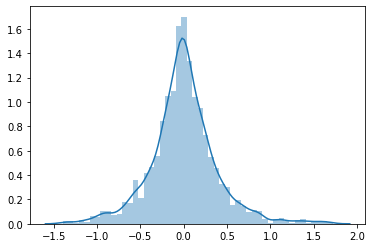

In [53]:
# It will show the skewness with kde
sns.distplot(x)
plt.show()

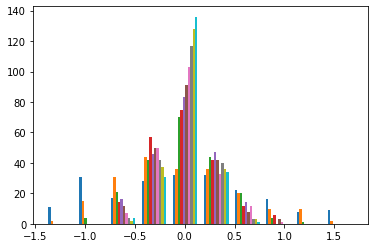

In [54]:
# One of the visualization technique, it too shows the skewness
plt.hist(x)
plt.show()

In [55]:
#StandardScaler: Used to scale the data
scale = StandardScaler()
x = scale.fit_transform(x)
x

array([[-0.4079449 ,  1.48221206,  0.61019192, ..., -0.44439051,
         0.07252068, -2.38985647],
       [ 1.15527622,  1.16221258,  0.02279652, ...,  1.01452109,
        -2.69945583, -2.34826316],
       [-0.06978009,  0.36130267,  1.6425083 , ..., -0.37903361,
         0.60401286, -2.35014645],
       ...,
       [ 0.37383332, -1.94747114,  0.58029391, ..., -1.0575966 ,
        -0.35317789, -1.74344746],
       [-0.08674406, -1.66826902,  0.50163468, ..., -0.31183094,
        -0.12303388, -0.9215044 ],
       [-0.09387715, -1.52247871, -0.00478311, ...,  0.11472835,
         0.6065167 , -0.75812441]])

In [56]:
#train_test_split for further algo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .22, random_state= 43)


In [57]:
x_train.shape

(160, 10)

In [58]:
y_train.shape

(160,)

In [59]:
x_test.shape

(46, 10)

In [60]:
y_test.shape

(46,)

In [61]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
svc = SVC()
gnb = GaussianNB()

In [62]:
models = []
models.append(('LogisticRegression', lr))
models.append(('DecisionTreeClassifier', dtc))
models.append(('SVC', svc))
models.append(('GaussianNB', gnb))


************************************************ LogisticRegression ***************************
Accuracy score:  73.91304347826086
Cross_Val_Score =  68.57142857142857


[0.         0.19047619 1.        ] [0.   0.68 1.  ] [2 1 0]
RUC_AUC_Score:  0.7447619047619048



 Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.81      0.74        21
           1       0.81      0.68      0.74        25

    accuracy                           0.74        46
   macro avg       0.74      0.74      0.74        46
weighted avg       0.75      0.74      0.74        46


Confusion_matrix: 
 [[17  4]
 [ 8 17]]




************************************************ DecisionTreeClassifier ***************************
Accuracy score:  78.26086956521739
Cross_Val_Score =  58.904761904761905


[0.         0.19047619 1.        ] [0.   0.76 1.  ] [2 1 0]
RUC_AUC_Score:  0.7847619047619048



 Classification Report: 
               precision    recall  

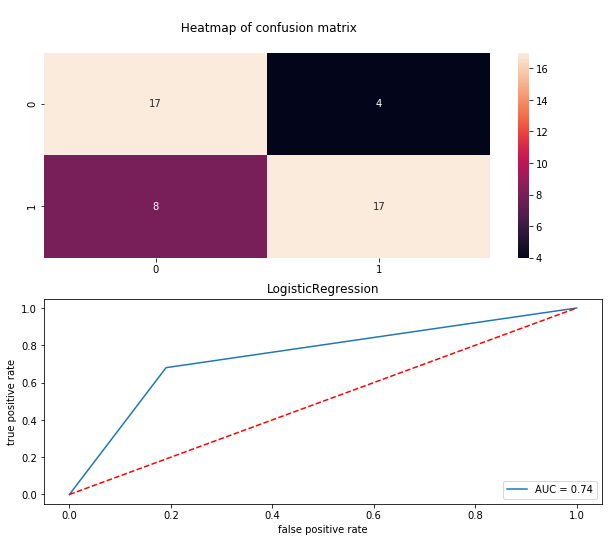

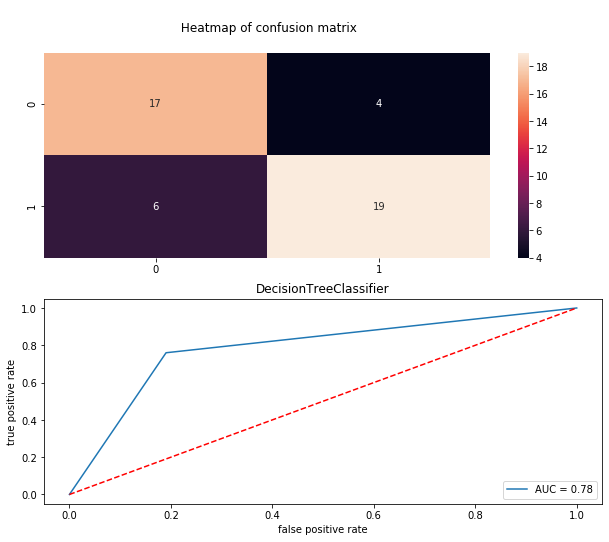

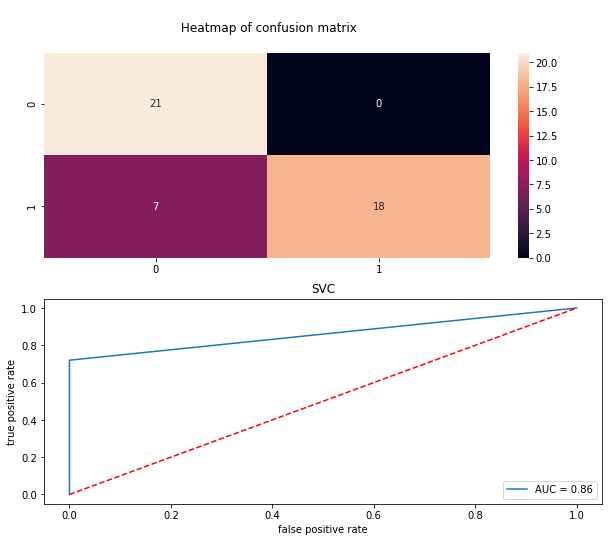

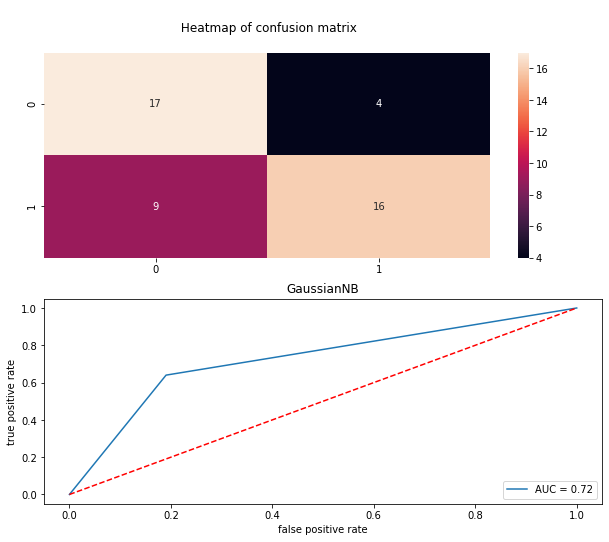

In [63]:
model = []
score = []
cvs = []
rocscore = []
preds = []

for name, mod in models:
    
    print ('\n************************************************',name,'***************************')
    model.append(mod)    
    mod.fit(x_train, y_train)
    scr = mod.score(x_train, y_train)
    pred = mod.predict(x_test)
    preds.append(pred)
                       
    print ("Accuracy score: ", accuracy_score(y_test, pred)*100)
    score.append(accuracy_score(y_test, pred)*100)
    
    sc = cross_val_score(mod, x ,y, cv=10, scoring='accuracy').mean()
    print ("Cross_Val_Score = ", sc*100) 
    cvs.append(sc*100)
    print ("\n")

    fpr, tpr, thresholds = roc_curve(y_test, pred)                                    
    print (fpr, tpr, thresholds)
    
    roc_auc = auc(fpr, tpr)
    print ('RUC_AUC_Score: ', roc_auc)
    rocscore.append(roc_auc*100)
    print ("\n")
    
    cm = confusion_matrix(y_test, pred)    
    print ("\n Classification Report: \n", classification_report(y_test, pred))
    print ("\nConfusion_matrix: \n", confusion_matrix(y_test, pred))
    
    plt.figure(figsize=(10, 40))
    plt.subplot(911)
    plt.title("\n Heatmap of confusion matrix\n")
    sns.heatmap(cm, annot=True)
    
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    
    plt.plot([0,1], [0,1], 'r--')
    plt.legend(loc='lower right')
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    print ('\n\n')

In [64]:
result = pd.DataFrame({'Model': model, 'Accuracy_score': score, 'Cross_Val_Score': cvs, 'ROC_Auc_Curve': rocscore, 'Predicted Values': preds})
result

,Model,Accuracy_score,Cross_Val_Score,ROC_Auc_Curve,Predicted Values
0,"LogisticRegression(C=1.0, class_weight=None, d...",73.913043,68.571429,74.47619,"[1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, ..."
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",78.260870,58.904762,78.47619,"[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, ..."
2,"SVC(C=1.0, break_ties=False, cache_size=200, c...",84.782609,64.666667,86.00000,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
3,"GaussianNB(priors=None, var_smoothing=1e-09)",71.739130,62.261905,72.47619,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ..."


In [65]:
params = {'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=10)
grid.fit(x,y)
print ("\nBest Params: ", grid.best_params_)
print ("\nBest Score: \n", grid.best_score_)


Best Params:  {'kernel': 'poly'}

Best Score: 
 0.6992857142857143


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=43, test_size=.20)
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print ("\nAccuracy score: ", accuracy_score(y_test, pred))



Accuracy score:  0.8571428571428571


In [70]:
import joblib
joblib.dump(svc, 'Sonar_result.joblib')
clf = joblib.load('Sonar_result.joblib')
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
clf.predict(x_test)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0])